In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Data loading
data_dir = './data/'
df1 = pd.read_csv('../data/train_features_part1.csv')
df2 = pd.read_csv('../data/train_features_part2.csv')

train_features              =       pd.concat([df1, df2], ignore_index=True)
test_features               =       pd.read_csv('../data/test_features.csv')
train_targets_nonscored     =       pd.read_csv('../data/train_targets_nonscored.csv')
train_targets_scored        =       pd.read_csv('../data/train_targets_scored.csv')
train_drug                  =       pd.read_csv('../data//train_drug.csv')

### Draw percentage of cp_type, cp_dose, and cp_time

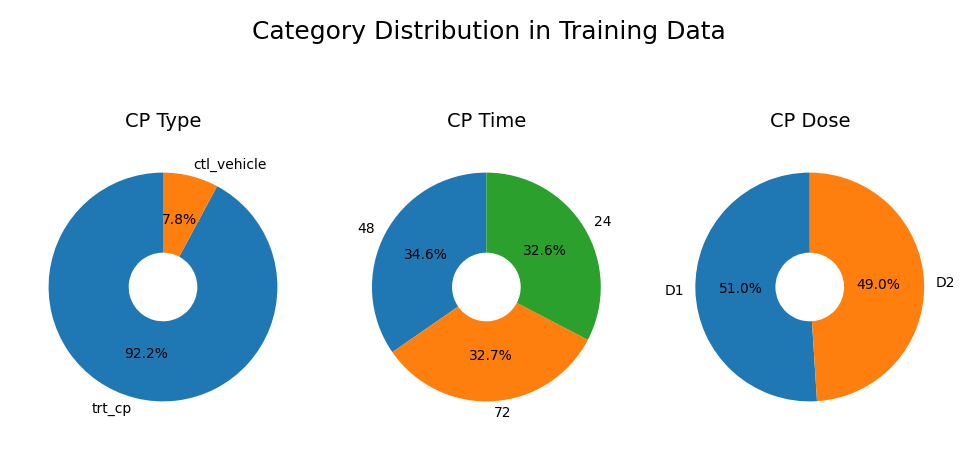

In [3]:
def plot_pie_chart(ax, data, title):
    counts = data.value_counts()

    labels = counts.index.tolist()
    values = counts.values.tolist()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    wedges, text, autotext = ax.pie(
        values,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.7),
        textprops=dict(fontsize=5),  # 调整字体大小
    )

    ax.set_title(title, fontsize=7)

# 创建子图布局
fig, axes = plt.subplots(1, 3, figsize=(5, 2), dpi=200)

# cp_type
plot_pie_chart(axes[0], train_features['cp_type'], 'CP Type')

# cp_time
plot_pie_chart(axes[1], train_features['cp_time'], 'CP Time')

# cp_dose
plot_pie_chart(axes[2], train_features['cp_dose'], 'CP Dose')

# 添加大标题
fig.suptitle('Category Distribution in Training Data', fontsize=9, y=1.1)

# 调整图形布局
plt.tight_layout()

# 保存图形
plt.savefig('../pic/training_data_category_pie.png', dpi=300)

# 显示图形
plt.show()


# Draw correlation between cell visibility and gene features

In [8]:
import random

In [9]:
train_columns = train_features.columns.to_list()

g_list = [i for i in train_columns if i.startswith('g-')]

c_list = [i for i in train_columns if i.startswith('c-')]

In [27]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.3 MB/s eta 0:00:00a 0:00:01


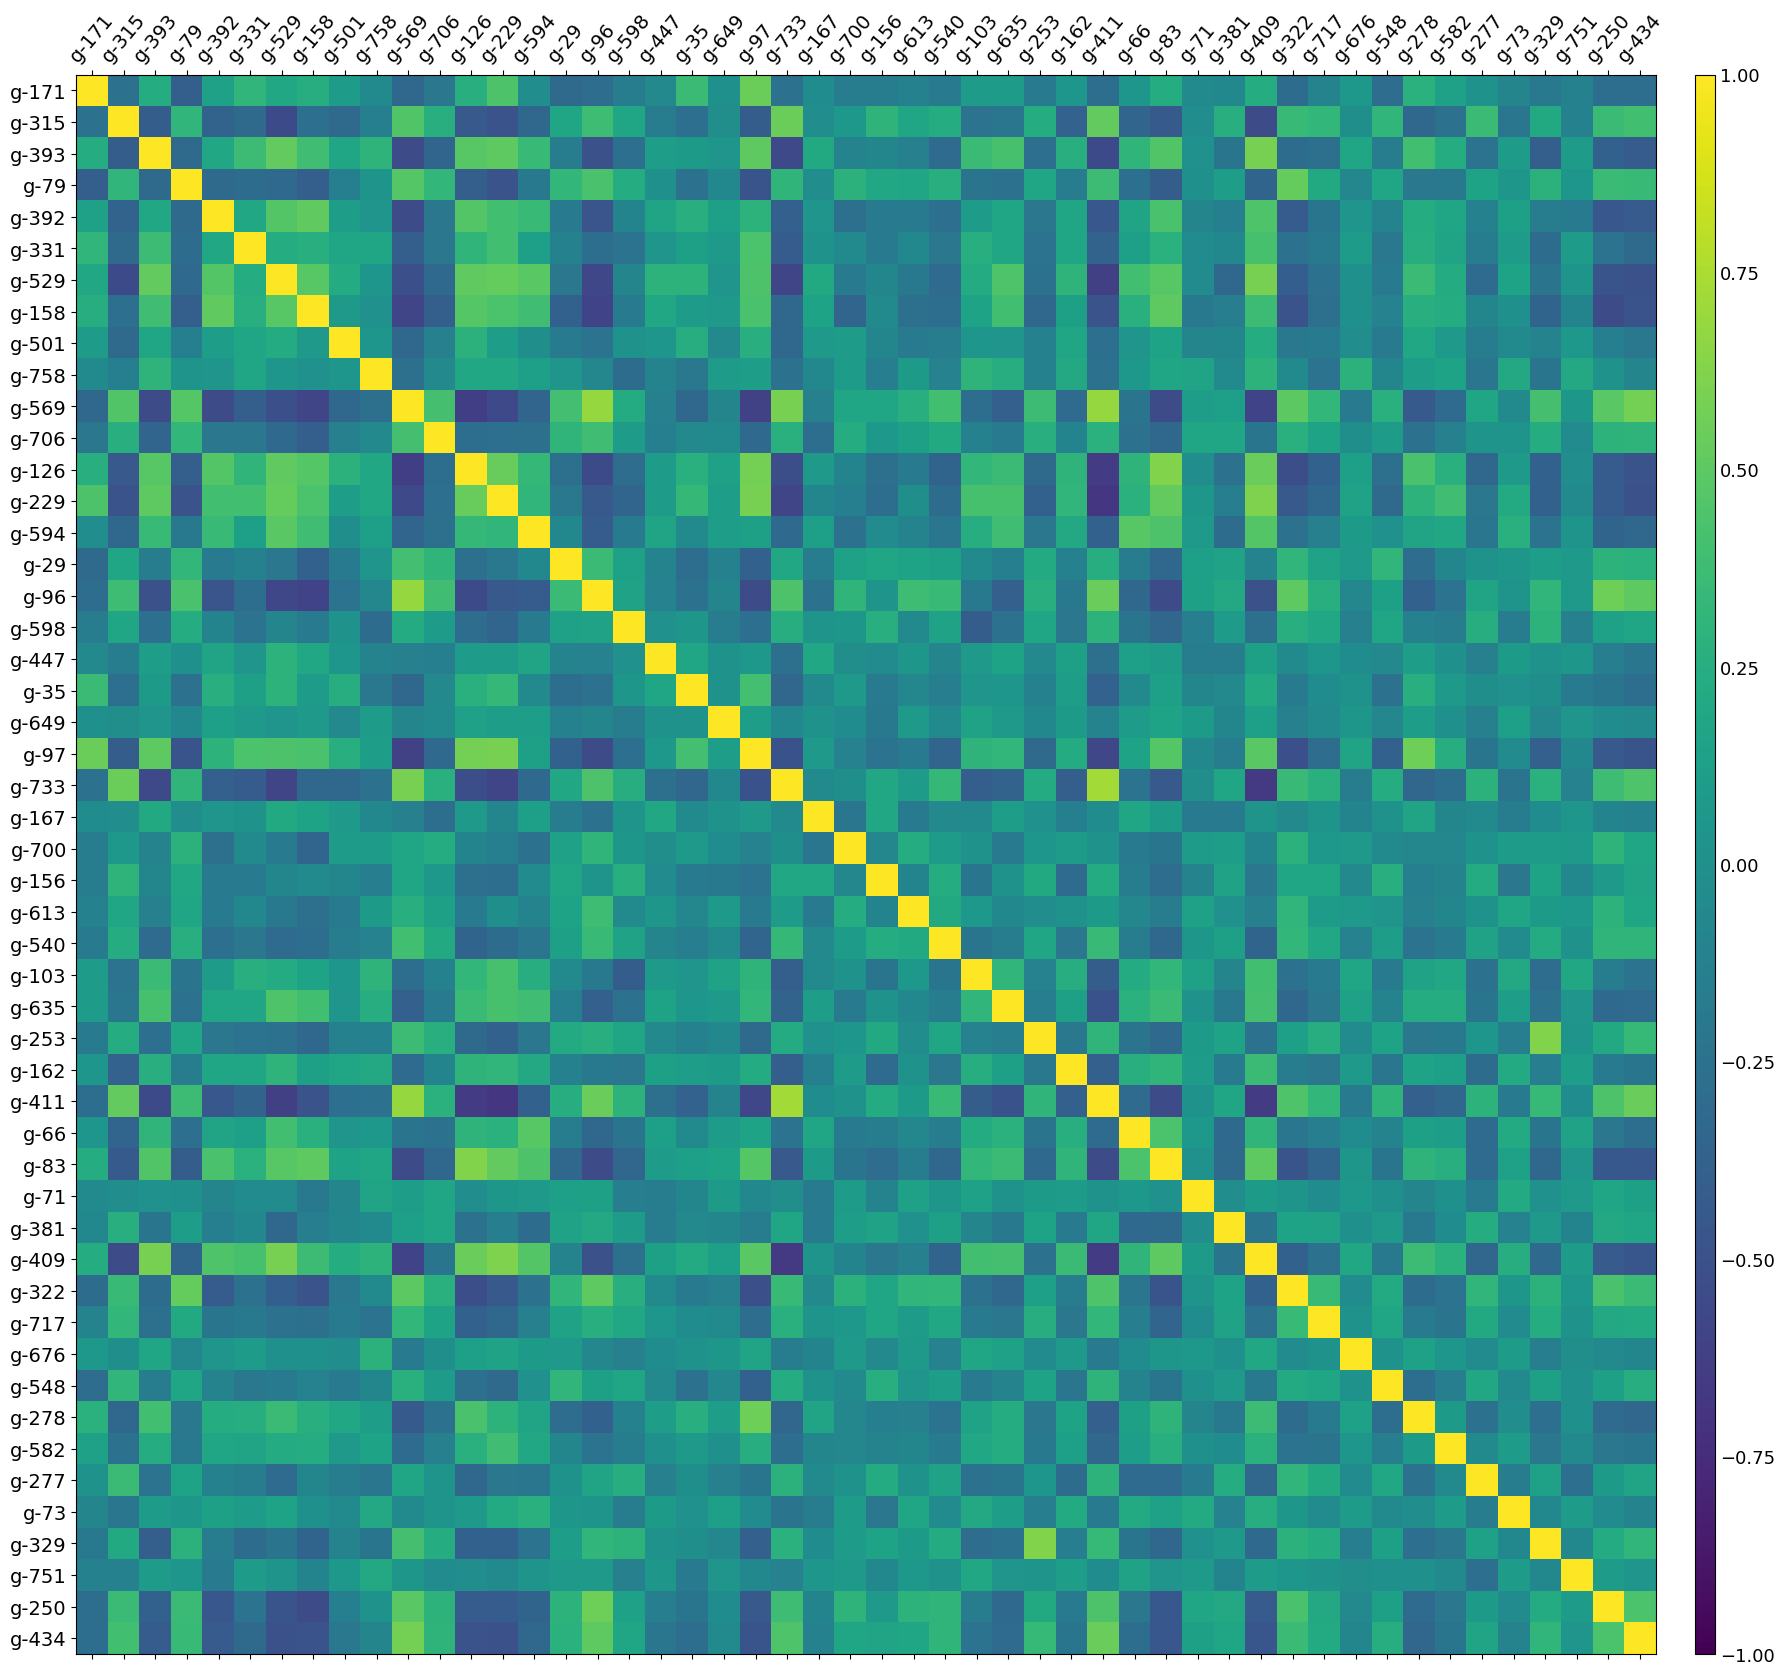

In [40]:
columns = g_list
for_correlation = random.sample(columns, 50)
data = train_features[for_correlation]

f = plt.figure(figsize=(18, 18))

ax = plt.gca()
im = ax.matshow(data.corr(), vmin=-1, vmax=1)  # 使用'coolwarm'颜色映射，并设置值范围为-1到1

plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=50)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

# 创建颜色条的子图
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# 绘制颜色条并调整其长度
cb = plt.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=13)

# 调整颜色条的高度和位置
cb.ax.set_aspect(40)  # 调整数值以控制颜色条的高度
cb.ax.yaxis.set_tick_params(size=0)  # 隐藏颜色条的刻度线

plt.tight_layout()
plt.savefig('../pic/gene_cor.png', dpi=300)
plt.show()


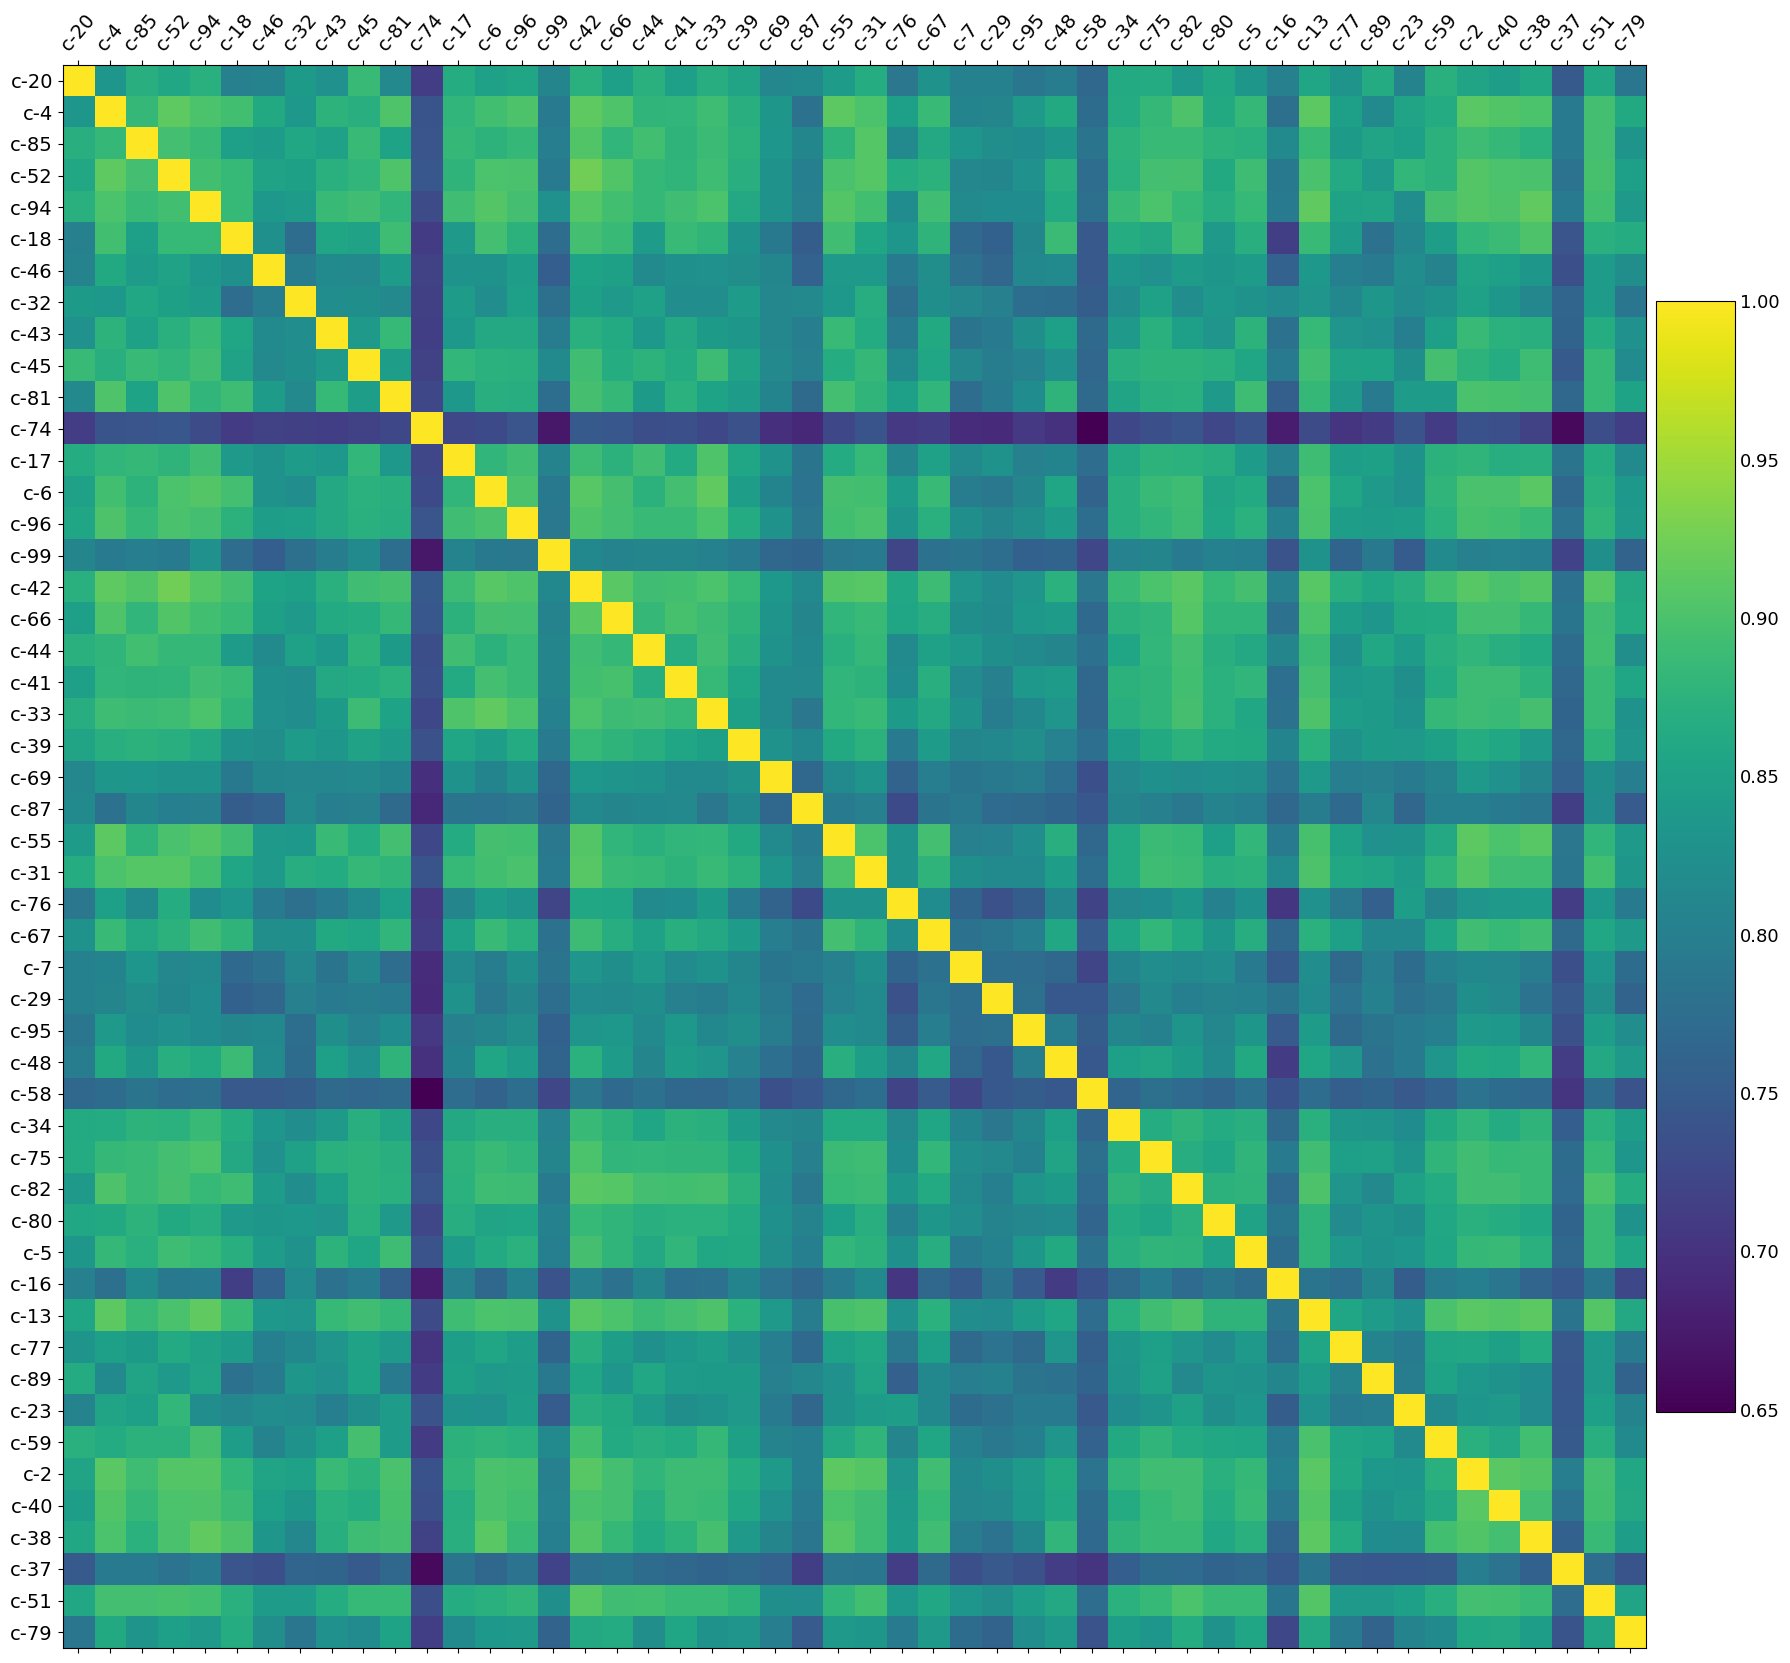

In [41]:
columns = c_list
for_correlation = random.sample(columns, 50)
data = train_features[for_correlation]

f = plt.figure(figsize=(18, 18))

ax = plt.gca()
im = ax.matshow(data.corr())  # 使用'coolwarm'颜色映射，并设置值范围为-1到1

plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=50)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

# 创建颜色条的子图
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# 绘制颜色条并调整其长度
cb = plt.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=13)

# 调整颜色条的高度和位置
cb.ax.set_aspect(40)  # 调整数值以控制颜色条的高度
cb.ax.yaxis.set_tick_params(size=0)  # 隐藏颜色条的刻度线

plt.tight_layout()
plt.savefig('../pic/cell_cor.png', dpi=300)
plt.show()
